### The model

$u(c) = log(c)$ utility function    
$y = 5$ Deterministic income    
$p(r = 0.05) = 0.5$   
$p(r = -0.05) = 0.5$ 

### value iteration 

In [6]:
# infinite horizon MDP problem
%pylab inline
import numpy as np
from scipy.optimize import minimize
def u(c):
    return np.log(c)

Populating the interactive namespace from numpy and matplotlib


/home/hfsluser/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
# discounting factor 
beta = 0.95
# wealth level
w_low = 0 
w_high = 100
# interest rate
r = 0.02
# deterministic income
y = 1
# good state and bad state economy with equal probability 0.5
# with good investment return 0.05 or bad investment return -0.05
ws = np.linspace(0.001,10,100)
Vs = np.zeros(100)
Cs = np.zeros(100)

In [24]:
# Value iteration
for j in range(10):
    if j % 10 == 0:
        print(j)
    for i in range(len(ws)):
        w = ws[i]
        def obj(c):
            return -(u(c) + beta*(np.interp((y+w-c)*(1+r), ws, Vs) + np.interp((y+w-c)*(1-r), ws, Vs))/2)
        bounds = [(0.0001, y+w-0.0001)]
        res = minimize(obj, 0.0001, method='SLSQP', bounds=bounds)
        Cs[i] = res.x[0]
        Vs[i] = -res.fun

0


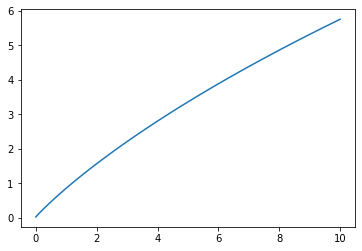

In [25]:
plt.plot(ws,Vs)

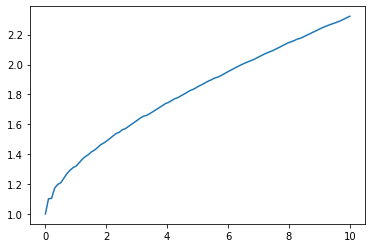

In [26]:
plt.plot(ws,Cs)

### policy gradient
Assume the policy form $\theta = (a,b,c,\mu, \sigma)$, then $c = a w^2 + b w + c + Z$ where $Z$ is normally distributed $N(\mu, \sigma)$

Asume the initial value $a = 1$, $b = 1$, $c = 1$, $\mu = 0$, $\sigma = 1$